# `Delivery Time Data Analysis`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [2]:
df = pd.read_csv('deliverytime.csv')
df.sample(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
29360,AFD1,CHENRES010DEL01,28,4.7,13.066762,80.251865,13.136762,80.321865,Meal,motorcycle,15
43180,5F87,SURRES17DEL02,25,4.5,21.149569,72.772697,21.229569,72.852697,Drinks,scooter,26
30918,44A8,COIMBRES01DEL01,35,4.8,11.016298,76.972076,11.126298,77.082076,Buffet,motorcycle,37
34284,469C,MUMRES15DEL02,32,4.0,19.176269,72.836721,19.196269,72.856721,Buffet,motorcycle,20
30625,6FA,JAPRES05DEL01,29,4.6,26.905287,75.794592,26.945287,75.834592,Snack,motorcycle,19


## Preprocessing

In [3]:
df.index = df['ID']
df.drop(columns=['ID','Delivery_person_ID'], inplace=True)

In [4]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
ID,,,,,,,,,
4607,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
B379,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
5D6D,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
7A6A,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
70A2,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45593 entries, 4607 to 5FB2
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  int64  
 1   Delivery_person_Ratings      45593 non-null  float64
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Type_of_order                45593 non-null  object 
 7   Type_of_vehicle              45593 non-null  object 
 8   Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 3.5+ MB


In [6]:
df.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [7]:
print(df.duplicated().sum()*100/len(df))
# dropping the duplicates
df.drop_duplicates(inplace=True)

0.06141293619634593


In [8]:
print(df.duplicated().sum())

0


## Feature Engineering

In [9]:
from geopy.distance import geodesic
df['Distance'] = df.apply(
    lambda r: geodesic((r['Restaurant_latitude'], r['Restaurant_longitude']),
                       (r['Delivery_location_latitude'], r['Delivery_location_longitude'])).kilometers, axis=1)


In [10]:
df.sample(3)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),Distance
ID,,,,,,,,,,
DBDC,34,4.8,15.561550,73.749092,15.601550,73.789092,Meal,scooter,37,6.164140
68DC,23,4.7,22.307898,73.167788,22.347898,73.207788,Drinks,motorcycle,35,6.049917
CBB,21,4.7,23.354422,85.332900,23.374422,85.352900,Snack,scooter,10,3.014595


In [11]:
df.drop(columns=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'], axis=1, inplace=True)
df.sample(4)

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),Distance
ID,,,,,,
BDC,29,4.6,Meal,scooter,15,9.165678
3E+05,24,4.7,Meal,motorcycle,23,16.611208
DB04,33,5.0,Drinks,scooter,33,12.552276
5FB2,23,4.9,Snack,scooter,36,12.057294


## Exploratory Data Analysis

In [12]:
# from ydata_profiling import ProfileReport
# report = ProfileReport(df, title='Delivery Time Data')
# repo = report.to_file('report.html')

In [13]:
from IPython.display import IFrame
IFrame(src='report.html', width=1000, height=800)

## Feature Encoding

In [14]:
df['Type_of_order'].value_counts()

Type_of_order
Snack      11523
Meal       11454
Drinks     11317
Buffet     11271
Name: count, dtype: int64

In [15]:
df['Type_of_vehicle'].value_counts()

Type_of_vehicle
motorcycle           26415
scooter              15269
electric_scooter      3813
bicycle                 68
Name: count, dtype: int64

In [16]:
order_dum = pd.get_dummies(df['Type_of_order'], drop_first=True, dtype='int')
df = pd.concat([df,order_dum], axis=1)

In [17]:
vehicle_dum = pd.get_dummies(df['Type_of_vehicle'], drop_first=True, dtype='int')
df = pd.concat([df, vehicle_dum], axis=1)
df.drop(columns=['Type_of_order','Type_of_vehicle'], axis=1, inplace=True)

In [18]:
df.sample(4)

,Delivery_person_Age,Delivery_person_Ratings,Time_taken(min),Distance,Drinks,Meal,Snack,electric_scooter,motorcycle,scooter
ID,,,,,,,,,,
E0D0,22,4.9,42,19.599407,0,0,1,0,1,0
E20E,20,4.8,22,14.121310,0,1,0,0,1,0
2875,27,4.6,13,3.059411,1,0,0,0,0,1
71B,29,4.6,25,4.648765,1,0,0,0,0,1


In [19]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Time_taken(min),Distance,Drinks,Meal,Snack,electric_scooter,motorcycle,scooter
count,45565.000000,45565.000000,45565.000000,45565.000000,45565.000000,45565.000000,45565.000000,45565.000000,45565.000000,45565.000000
mean,29.544694,4.632347,26.296412,99.255358,0.248370,0.251377,0.252891,0.083683,0.579721,0.335104
std,5.697080,0.327789,9.384509,1100.260704,0.432073,0.433810,0.434674,0.276914,0.493609,0.472032
min,15.000000,1.000000,10.000000,1.463837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,4.600000,19.000000,4.654185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,4.700000,26.000000,9.247384,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,34.000000,4.800000,32.000000,13.742674,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,50.000000,6.000000,54.000000,19709.575543,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

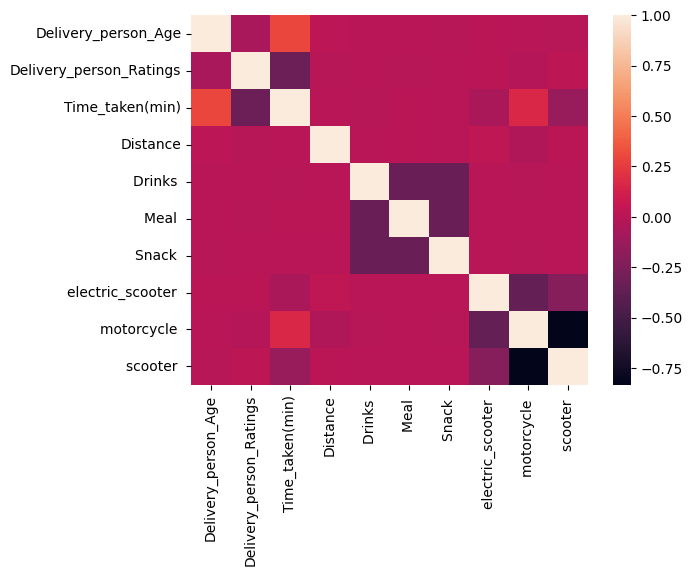

In [20]:
sns.heatmap(df.corr())

## Feature Scaling

In [21]:
# Before scaling, we should check outliers
# if outlier present then choose Standardization (z-score) otherwise if outliers are not extreme then use Normalization (MinMaxScaler)

In [22]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_taken(min)',
       'Distance', 'Drinks ', 'Meal ', 'Snack ', 'electric_scooter ',
       'motorcycle ', 'scooter '],
      dtype='object')

### Checking Outliers

In [23]:
cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_taken(min)',
       'Distance', 'Drinks ', 'Meal ', 'Snack ', 'electric_scooter ',
       'motorcycle ', 'scooter ']
for i in range(len(cols)):
    if cols[i]==df.columns[i]:
        print('Yes')
    else:
        print('No')
# We have extra spaced in columns names, let's remove them

Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes


In [24]:
trimmed_cols = [i.strip() for i in cols]
trimmed_cols

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Time_taken(min)',
 'Distance',
 'Drinks',
 'Meal',
 'Snack',
 'electric_scooter',
 'motorcycle',
 'scooter']

In [25]:
df.columns = trimmed_cols
df.sample()

,Delivery_person_Age,Delivery_person_Ratings,Time_taken(min),Distance,Drinks,Meal,Snack,electric_scooter,motorcycle,scooter
ID,,,,,,,,,,
BB8B,28,4.7,20,17.042819,0,0,0,0,1,0


In [26]:
print(np.quantile(df['Time_taken(min)'], 0.25))

19.0


In [27]:
out_col = {}
for i in trimmed_cols:
    q1 = np.quantile(df[i], 0.25)
    q3 = np.quantile(df[i], 0.75)
    iqr = q3-q1
    ll = q1-1.5*iqr
    ul = q3+1.5*iqr
    outliers = df[(df[i]<ll) | (df[i]>ul)]
    out_col[i] = outliers
for i in trimmed_cols:
    print(f'{i}: {len(out_col[i]) / len(df[i]) * 100:.2f}')
# we can ignore the outliers for Drinks column, because it contains binary values, outlier detection does not make sense here

Delivery_person_Age: 0.12
Delivery_person_Ratings: 11.73
Time_taken(min): 0.59
Distance: 0.95
Drinks: 24.84
Meal: 0.00
Snack: 0.00
electric_scooter: 8.37
motorcycle: 0.00
scooter: 0.00


## Standarization

In [28]:
# before scaling, we should split out data
x = df.drop(columns=['Time_taken(min)'], axis=1)
y = df[['Time_taken(min)']]

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = df.copy()
df_scaled['Distance'] = sc.fit_transform(df_scaled[['Distance']])

# Machine Learning Models

In [30]:
from pycaret.regression import *

In [33]:
s = setup(df, target='Time_taken(min)', session_id=123, train_size=0.8, index=False, use_gpu=True, normalize=True, normalize_method='zscore')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

,Description,Value
0,Session id,123
1,Target,Time_taken(min)
2,Target type,Regression
3,Original data shape,"(45899, 10)"
4,Transformed data shape,"(45899, 10)"
5,Transformed train set shape,"(36719, 10)"
6,Transformed test set shape,"(9180, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

In [34]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,5.7165,52.6541,7.2557,0.4042,0.2823,0.2532,2.1140
gbr,Gradient Boosting Regressor,5.7216,52.7008,7.2589,0.4037,0.2823,0.2536,5.1650
ada,AdaBoost Regressor,6.0592,57.0374,7.5519,0.3546,0.2985,0.2789,1.4450
rf,Random Forest Regressor,6.1533,62.0691,7.8776,0.2976,0.3047,0.2716,4.9060
knn,K Neighbors Regressor,6.3235,65.1393,8.0703,0.2630,0.3111,0.2778,0.4960
lr,Linear Regression,6.6547,70.3098,8.3845,0.2045,0.3220,0.2966,0.1150
ridge,Ridge Regression,6.6547,70.3097,8.3845,0.2045,0.3220,0.2966,0.1100
lar,Least Angle Regression,6.6547,70.3109,8.3846,0.2045,0.3220,0.2966,0.1110
br,Bayesian Ridge,6.6546,70.3083,8.3844,0.2045,0.3220,0.2966,0.1210
huber,Huber Regressor,6.5998,71.0830,8.4305,0.1957,0.3191,0.2856,0.4050


In [35]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [38]:
final_model = finalize_model(best_model)

# Predict on test set
preds = predict_model(final_model, data=df)

# Check results
preds[['Time_taken(min)']]  # actual vs predicted

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,5.5838,50.1681,7.0829,0.4310,0.2763,0.2474


,Time_taken(min)
0,33
1,25
2,18
3,23
4,22
...,...
45894,29
45895,20
45896,33
45897,33
